<a href="https://colab.research.google.com/github/elinasyr/eeg-motor-control/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load and unzip data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/Biosignal_Data/Real.zip

### Imports

In [ ]:
!pip install mne

In [ ]:
import os
#import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend,lfilter,firwin

['both', 'none']
Processing folder: both
filtered_both
pilot10_evnt10_session1_noisy.csv


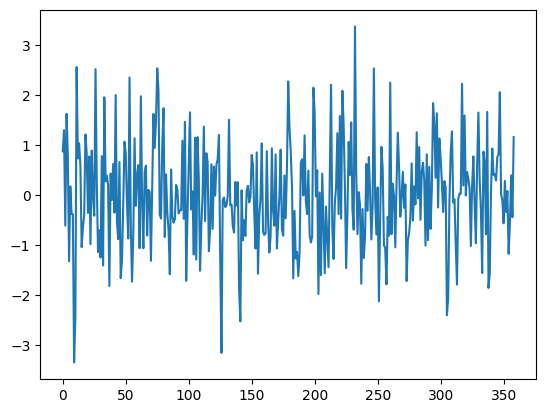

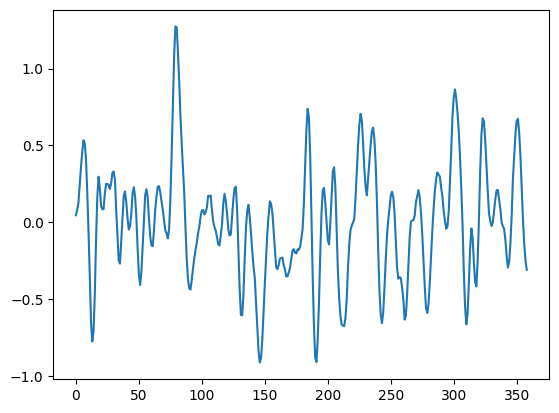

pilot10_evnt11_session1_noisy.csv


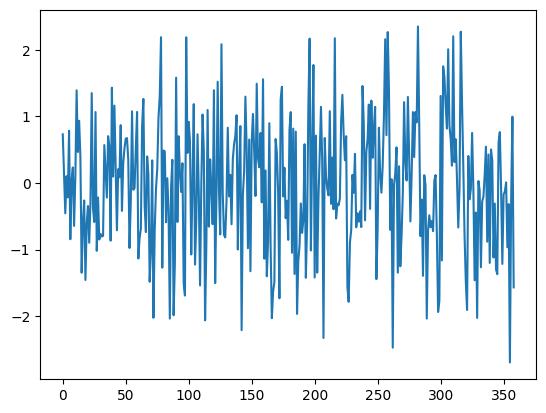

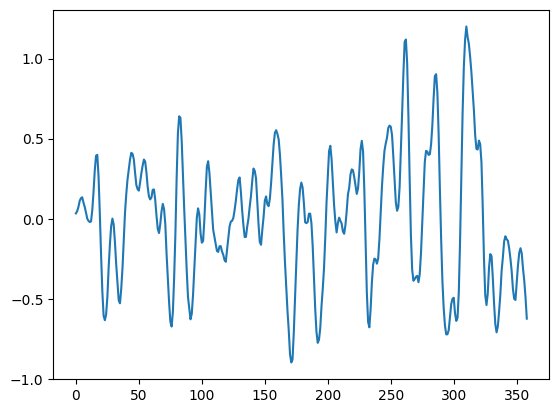

pilot10_evnt12_session1_noisy.csv


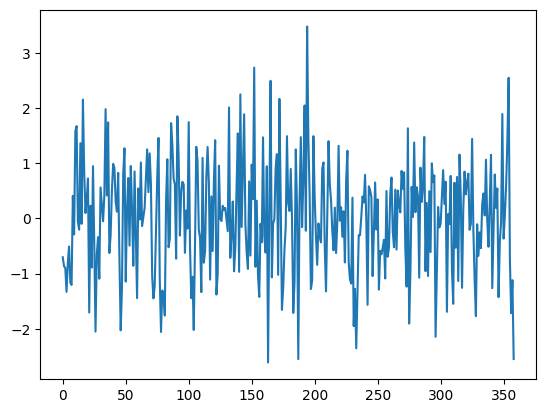

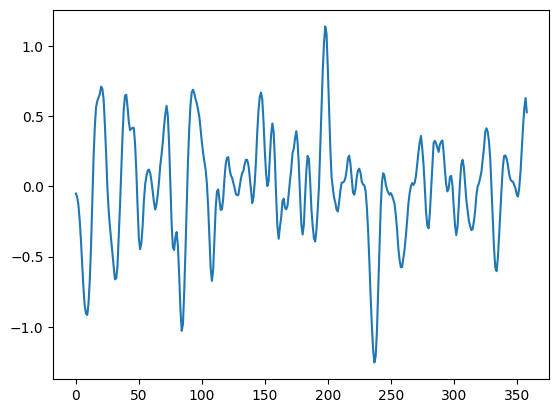

pilot10_evnt13_session1_noisy.csv


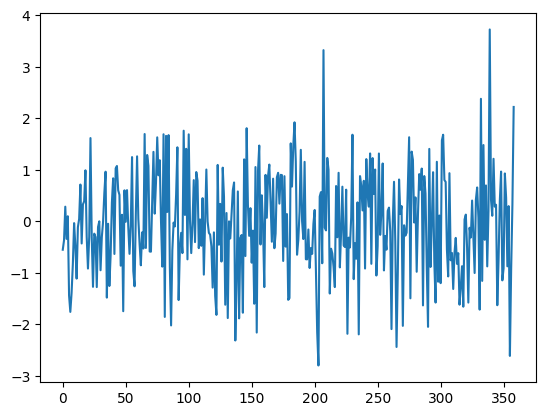

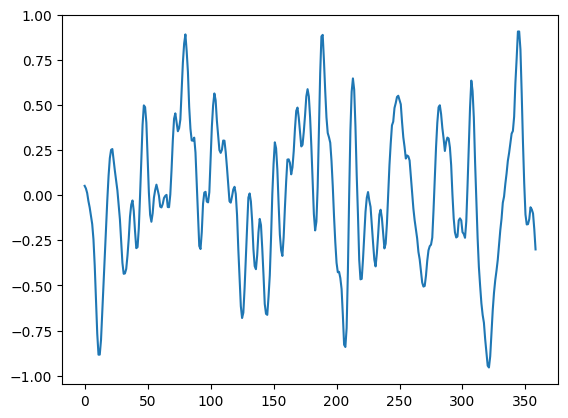

pilot10_evnt14_session1_noisy.csv


KeyboardInterrupt: 

In [ ]:
base_dir = "drive/MyDrive/Real"
print(os.listdir(base_dir))
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder}")
        for file in sorted(os.listdir(folder_path)):
            print(file)
            if file.startswith('pilot') and file.endswith('.csv'):
              df = pd.read_csv(os.path.join(folder_path, file), names=None, header=None)
              channel_names = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
              df.index = channel_names
              #FIR filter
              raw=df.values
              fir_coefficients = firwin(11, [0.1, 2], pass_zero=False, fs=256)
              #fir_coefficients = firwin(21, [1, 35], pass_zero=False, fs=256)
              filtered_data = lfilter(fir_coefficients, 1, raw, axis=1)

              #raw=mne.filter.filter_data(data=df.values, sfreq=256, l_freq=1.0, h_freq=35.0, fir_design='firwin', filter_length='10s')
              #filt=mne.filter.create_filter(data=raw, sfreq=256, l_freq=1.0, h_freq=35.0, fir_design='firwin', filter_length='auto')

              #Mean removal and detrending
              filtered_data -= filtered_data.mean(axis=1, keepdims=True)  # Mean removal
              filtered_data = detrend(filtered_data, axis=1)  # Detrending
              plt.figure()
              plt.plot(df.loc['C2',:])
              plt.show()

              #print(df)

              #Save data
              processed_df = pd.DataFrame(filtered_data, index=channel_names)
              processed_df.to_csv((folder + "/"+file).replace('noisy','filtered'), index=False)
              #print(processed_df)
              plt.figure()
              plt.plot(processed_df.loc['C2',:])
              plt.show()


In [ ]:
!zip -r drive/MyDrive/none.zip none

mean, std, correlation, legth of signals
